In [ ]:
!pip install tensorflow
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
import pandas as pd
import numpy as np
#df = pd.read_csv('loss.csv')
#df = pd.read_csv('Loss500e.csv')
import matplotlib.pyplot as plt
dfr = pd.read_csv('/content/drive/MyDrive/hourglasstensorlfow-master/norm_dist.csv')
dfd = pd.read_csv('/content/drive/MyDrive/hourglasstensorlfow-master/norm_dist.csv')
#legend = ["training loss"]
fig = plt.figure()
#fig = plt.figure(figsize=(9,5))
ax = plt.gca()
plt.plot(dfd,dfr)  # plot the time series
plt.xlabel("Normilized Distance")
plt.ylabel("Detection rate(in %)")
plt.show()
#plt.legend(legend, loc="upper right")

In [ ]:
pred=('/content/drive/MyDrive/hourglasstensorlfow-master/predictClass.py')
joints='/content/drive/MyDrive/hourglasstensorlfow-master/dataset.txt'
symmetry_joint_id=[(0,1),(1,2),(1,4),(1,3)]
joint_name=("muzzle", "top_of_the_head", " __tip_of_left_foreflipper", " __tip_of_right_foreflipper" ,"tail")


In [ ]:
function eval_pck(pred, joints, symmetry_joint_id, joint_name, name)
% PCK implementation
% torso height: || left_shoulder - right hip ||
 % symmetry_joint_id: key ID with symmetric relationship
 % joint_name: key name with symmetric relationship

range = 0:0.01:0.1;
show_joint_ids = (symmetry_joint_id >= 1:numel(symmetry_joint_id));
 
% compute distance to ground truth joints
dist = get_dist_pck(pred, joints(1:2,:,:));
 
 % Calculate PCK
pck_all = compute_pck(dist,range);
pck = pck_all(end, :);
pck(1:end-1) = (pck(1:end-1) + pck(symmetry_joint_id))/2;
 
 % visualization result
pck = [pck(show_joint_ids) pck(end)];
fprintf('------------ PCK Evaluation: %s -------------\n', name);
fprintf('Parts '); fprintf('& %s ', joint_name{:}); fprintf('& Mean\n');
fprintf('PCK   '); fprintf('& %.1f  ', pck); fprintf('\n');
 
% -------------------------------------------------------------------------
function dist = get_dist_pck(pred, gt)
assert(size(pred,1) == size(gt,1) && size(pred,2) == size(gt,2) && size(pred,3) == size(gt,3));
 
dist = nan(1,size(pred, 2), size(pred,3));
 
for imgidx = 1:size(pred,3)
     % torso diameter
  if size(gt, 2) == 14
    refDist = norm(gt(:,10,imgidx) - gt(:,3,imgidx));
  elseif size(gt, 2) == 10 % 10 joints FLIC
    refDist = norm(gt(:,7,imgidx) - gt(:,6,imgidx));
  elseif size(gt, 2) == 11 % 11 joints FLIC
    refDist = norm(gt(:,4,imgidx) - gt(:,11,imgidx));
  else
    error('Number of joints should be 14 or 10 or 11');
  end
 
     The distance between the predicted key point and the gt key point
  dist(1,:,imgidx) = sqrt(sum((pred(:,:,imgidx) - gt(:,:,imgidx)).^2,1))./refDist;
 
end
 
% -------------------------------------------------------------------------
function pck = compute_pck(dist,range)
pck = zeros(numel(range),size(dist,2)+1);
 
for jidx = 1:size(dist,2)
     % Calculate PCK for each set threshold
  for k = 1:numel(range)
    pck(k,jidx) = 100*mean(squeeze(dist(1,jidx,:)) <= range(k));
  end
end
 
 % Calculate the average PCK
for k = 1:numel(range)
  pck(k,end) = 100*mean(reshape(squeeze(dist(1,:,:)),size(dist,2)*size(dist,3),1) <= range(k));
end
The output is as follows:

SyntaxError: ignored

In [ ]:
import cv2
import pandas as pd

image_path=cv2.imread('/content/drive/MyDrive/hourglasstensorlfow-master/input_img/IMAG0573.jpg')
file_path='/content/drive/MyDrive/hourglasstensorlfow-master/dataset1.txt'
df=pd.read_csv(file_path, sep='\s+',header=None)
df1=df.iloc[0:1].to_numpy()
df1=df1[:,5:]
df.head(115)
#df1=df1.drop(df1[0], axis='columns', inplace=True) 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,IMAG0573.jpgA,102,735,1879,1050,322,1050,501,975,765,1226,535,1497,1290.0,1378.0
1,IM000094.jpgA,481,10,1551,789,521,616,691,335,1470,555,-1,-1,1575.0,193.0
2,7ef7f8e3-0ec6-4aec-8de2-189ad3ddcc9a-master.jpgA,41,171,3982,2864,3557,873,3329,310,-1,-1,2668,1771,155.0,2260.0
3,4541dda0-c656-4ee6-aeb9-1df9f7c637cd-halfpage....,11,9,1813,1583,1580,162,-1,-1,-1,-1,1472,665,477.0,1131.0
4,36c94868-44fa-4fdf-a644-ea579c15b6a2-master.jpgA,206,773,3890,2673,-1,-1,3623,1647,-1,-1,3305,2442,964.0,2196.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,IM000210.jpgA,2,342,1354,897,-1,-1,-97,562,-1,-1,-1,-1,-1.0,-1.0
111,IM000235.jpgA,0,417,1427,982,-1,-1,97,562,855,1300,-1,-1,-1.0,-1.0
112,IM000259.jpgA,0,362,1576,1178,-1,-1,-1,-1,-1,-1,1373,928,-1.0,-1.0
113,IM000260.jpgA,8,437,1592,877,-1,-1,-1,-1,-1,-1,1383,1023,-1.0,-1.0


In [ ]:
# images =  np.load('/content/drive/MyDrive/hourglasstensorlfow-master/image_name.npy', allow_pickle=True)
# predlist =  np.load('/content/drive/MyDrive/hourglasstensorlfow-master/predlist.npy', allow_pickle=True)
from matplotlib import pyplot as plt
def draw_keypoints_on_image(image, keypoints):
    keypoints=keypoints.reshape(-1,2)
    fig,ax = plt.subplots(1)
    ax.imshow(image)
    joint_list = ["muzzle", "head", "left_foreflipper", "right_foreflipper" ,"tail"]
    color =['tab:blue', 'tab:orange', 'g', 'r', 'mediumpurple']
    for i in range(len(keypoints)):
            joint_x = keypoints[i,0] 
            joint_y = keypoints[i,1]
            plt.scatter(joint_x, joint_y, s =100,c=color[i],label=joint_list[i])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))        
    plt.show()    

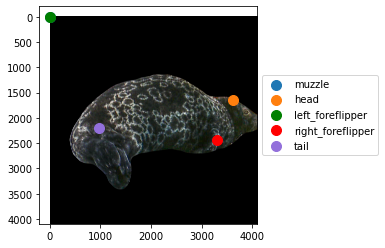

In [ ]:
draw_keypoints_on_image(image_path, df1)

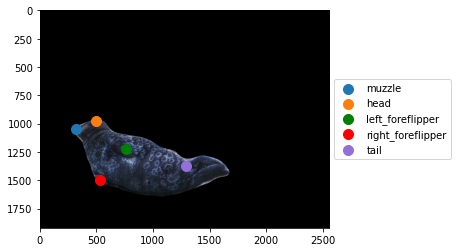

In [ ]:
draw_keypoints_on_image(image_path, df1)

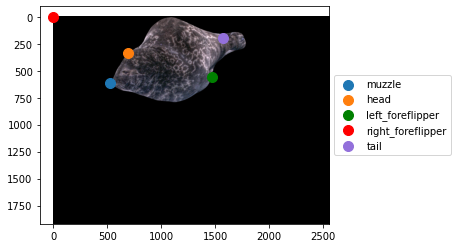

In [ ]:
draw_keypoints_on_image(image_path, df1)

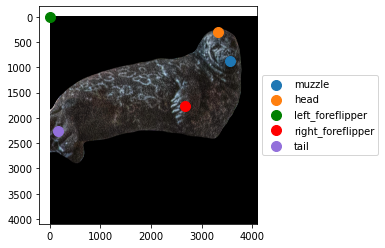

In [ ]:
draw_keypoints_on_image(image_path, df1)

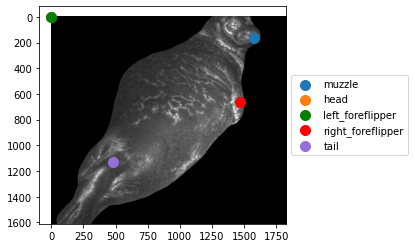

In [ ]:
draw_keypoints_on_image(image_path, df1)

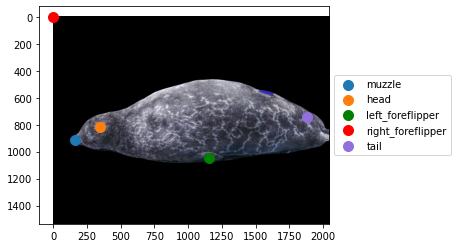

In [ ]:
draw_keypoints_on_image(image_path, df1)

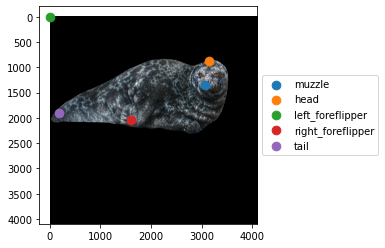

In [ ]:
draw_keypoints_on_image(image_path, df1)

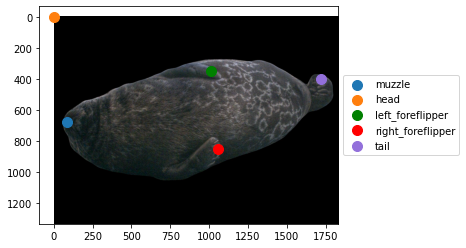

In [ ]:
draw_keypoints_on_image(image_path, df1)

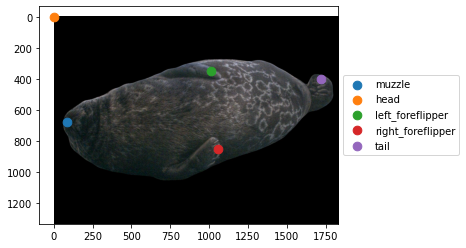

In [ ]:
draw_keypoints_on_image(image_path, df1)

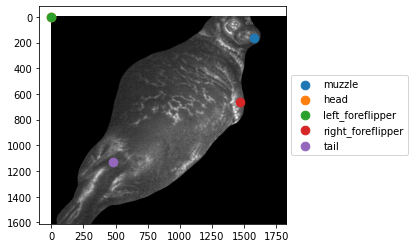

In [ ]:
draw_keypoints_on_image(image_path, df1)

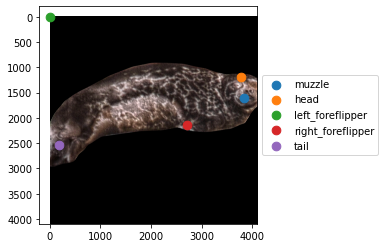

In [ ]:
draw_keypoints_on_image(image_path, df1)

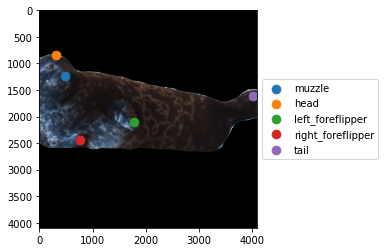

In [ ]:
draw_keypoints_on_image(image_path, df1)

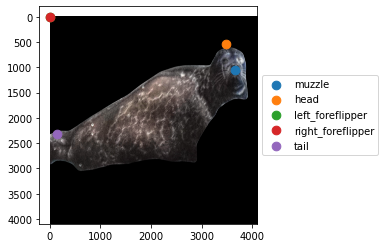

In [ ]:
draw_keypoints_on_image(image_path, df1)

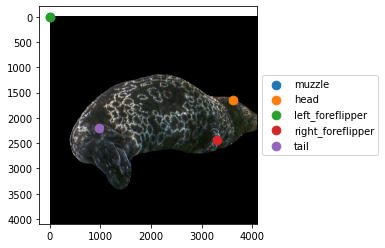

In [ ]:
draw_keypoints_on_image(image_path, df1)

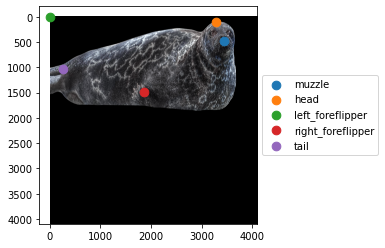

In [ ]:
draw_keypoints_on_image(image_path, df1)

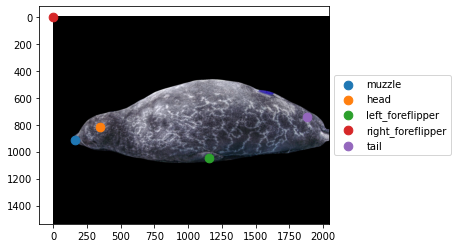

In [ ]:
draw_keypoints_on_image(image_path, df1)

In [ ]:
import os
original_kp = []
for image in images:
  #image_path=cv2.imread('/content/drive/MyDrive/hourglasstensorlfow-master/images/'+image)
  file_path='/content/drive/MyDrive/hourglasstensorlfow-master/dataset1.txt'
  #/content/drive/MyDrive/hourglasstensorlfow-master/dataset1.txt
  df=pd.read_csv(file_path, sep='\s+',header=None)
  # print(os.path.basename(image))
  # print(df.loc[df[0] == os.path.basename(image)+'A'])
  # df1=df.iloc[113:114].to_numpy()
  # df1=df1[:,5:]
  new_df = df.loc[df[0] == os.path.basename(image)+'A']
  kp = new_df.loc[:,5:].to_numpy()
  kp = kp.reshape(-1,2)
  print(kp)
  #print(df1)
  original_kp.append(kp)


In [ ]:
predlist[0]

array([[0.46875   , 0.66015625],
       [0.578125  , 0.50390625],
       [0.45703125, 0.62109375],
       [0.578125  , 0.81640625],
       [0.62890625, 0.62890625]])

In [ ]:
def pcki(joint_id, gtJ, prJ, idlh = 3, idrs =5):
	
		return np.linalg.norm(gtJ[joint_id]-prJ[joint_id][::-1]) / np.linalg.norm(gtJ[idlh]-gtJ[idrs])
	

In [ ]:
# original_kp = np.array(original_kp)
# original_kp
# predlist.shape
pcki(5, original_kp[0],predlist[0])

In [ ]:
import pandas as pd
import numpy as np
#df = pd.read_csv('loss.csv')
#df = pd.read_csv('Loss500e.csv')
import matplotlib.pyplot as plt
dfr = pd.read_csv('/content/drive/MyDrive/hourglasstensorlfow-master/Ratio.csv')
dfd = pd.read_csv('/content/drive/MyDrive/hourglasstensorlfow-master/norm_dist.csv')
#legend = ["training loss"]
fig = plt.figure()
#fig = plt.figure(figsize=(9,5))
ax = plt.gca()
plt.plot(dfr,dfd)  # plot the time series
plt.xlabel("Normilized Distance")
plt.ylabel("Detection rate(in %)")
plt.show()
#plt.legend(legend, loc="upper right")

In [ ]:
m = confusion_matrix (original_kp, predlist, labels = [1])

 

            #sns.heatmap (C2, annot = True,fmt="d", ax = ax) 

In [ ]:
def draw_keypoints_on_image(image, keypoints):
    keypoints=keypoints.reshape(-1,2)
    fig,ax = plt.subplots(1)
    ax.imshow(image)
    joint_list = ["muzzle", "head", "left_foreflipper", "ight_foreflipper" ,"tail"]
    for i in range(len(keypoints)):
            joint_x = keypoints[i,0] 
            joint_y = keypoints[i,1]
            plt.scatter(joint_x, joint_y, s = 20,label=joint_list[i])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))        
    plt.show()    
     

In [ ]:


def get_max_preds(batch_heatmaps):
    '''
    get predictions from score maps
    heatmaps: numpy.ndarray([batch_size, num_joints, height, width])
    '''
    assert isinstance(batch_heatmaps, np.ndarray), \
        'batch_heatmaps should be numpy.ndarray'
    assert batch_heatmaps.ndim == 4, 'batch_images should be 4-ndim'

    batch_size = batch_heatmaps.shape[0]
    num_joints = batch_heatmaps.shape[1]
    width = batch_heatmaps.shape[3]
    heatmaps_reshaped = batch_heatmaps.reshape((batch_size, num_joints, -1))
    idx = np.argmax(heatmaps_reshaped, 2)
    maxvals = np.amax(heatmaps_reshaped, 2)

    maxvals = maxvals.reshape((batch_size, num_joints, 1))
    idx = idx.reshape((batch_size, num_joints, 1))

    preds = np.tile(idx, (1, 1, 2)).astype(np.float32)

    preds[:, :, 0] = (preds[:, :, 0]) % width
    preds[:, :, 1] = np.floor((preds[:, :, 1]) / width)

    pred_mask = np.tile(np.greater(maxvals, 0.0), (1, 1, 2))
    pred_mask = pred_mask.astype(np.float32)

    preds *= pred_mask
    return preds, maxvals


def get_final_preds(config, batch_heatmaps, center, scale):
    coords, maxvals = get_max_preds(batch_heatmaps)

    heatmap_height = batch_heatmaps.shape[2]
    heatmap_width = batch_heatmaps.shape[3]

    # post-processing
    if config.TEST.POST_PROCESS:
        for n in range(coords.shape[0]):
            for p in range(coords.shape[1]):
                hm = batch_heatmaps[n][p]
                px = int(math.floor(coords[n][p][0] + 0.5))
                py = int(math.floor(coords[n][p][1] + 0.5))
                if 1 < px < heatmap_width-1 and 1 < py < heatmap_height-1:
                    diff = np.array([hm[py][px+1] - hm[py][px-1],
                                     hm[py+1][px]-hm[py-1][px]])
                    coords[n][p] += np.sign(diff) * .25

    preds = coords.copy()

    # Transform back
    for i in range(coords.shape[0]):
        preds[i] = transform_preds(coords[i], center[i], scale[i],
                                   [heatmap_width, heatmap_height])

    return preds, maxvals

def calc_dists(preds, target, normalize):
    preds = preds.astype(np.float32)
    target = target.astype(np.float32)
    dists = np.zeros((preds.shape[1], preds.shape[0]))
    for n in range(preds.shape[0]):
        for c in range(preds.shape[1]):
            if target[n, c, 0] > 1 and target[n, c, 1] > 1:
                normed_preds = preds[n, c, :] / normalize[n]
                normed_targets = target[n, c, :] / normalize[n]
                dists[c, n] = np.linalg.norm(normed_preds - normed_targets)
            else:
                dists[c, n] = -1
    return dists


def dist_acc(dists, thr=0.5):
    ''' Return percentage below threshold while ignoring values with a -1 '''
    dist_cal = np.not_equal(dists, -1)
    num_dist_cal = dist_cal.sum()
    if num_dist_cal > 0:
        return np.less(dists[dist_cal], thr).sum() * 1.0 / num_dist_cal
    else:
        return -1


def accuracy(output, target, hm_type='gaussian', thr=0.5):
    '''
    Calculate accuracy according to PCK,
    but uses ground truth heatmap rather than x,y locations
    First value to be returned is average accuracy across 'idxs',
    followed by individual accuracies
    '''
    idx = list(range(output.shape[1]))
    norm = 1.0
    if hm_type == 'gaussian':
        pred, _ = get_max_preds(output)
        target, _ = get_max_preds(target)
        h = output.shape[2]
        w = output.shape[3]
        norm = np.ones((pred.shape[0], 2)) * np.array([h, w]) / 10
    dists = calc_dists(pred, target, norm)

    acc = np.zeros((len(idx) + 1))
    avg_acc = 0
    cnt = 0

    for i in range(len(idx)):
        acc[i + 1] = dist_acc(dists[idx[i]])
        if acc[i + 1] >= 0:
            avg_acc = avg_acc + acc[i + 1]
            cnt += 1

    avg_acc = avg_acc / cnt if cnt != 0 else 0
    if cnt != 0:
        acc[0] = avg_acc
    return acc, avg_acc, cnt, pred

In [ ]:
# predlist
original_kp=keypoints.reshape(-1,2)


accuracy(predlist,original_kp)

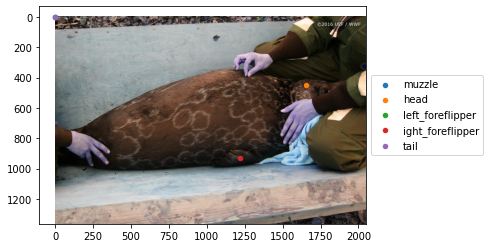

In [ ]:
draw_keypoints_on_image(image_path, df1)

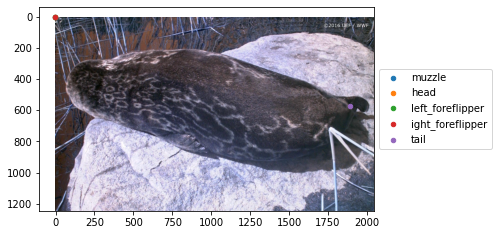

In [ ]:
draw_keypoints_on_image(image_path, df1)

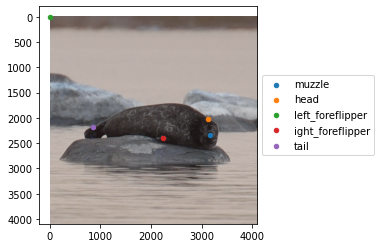

In [ ]:
draw_keypoints_on_image(image_path, df1)

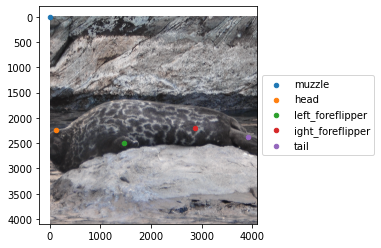

In [ ]:
draw_keypoints_on_image(image_path, df1)

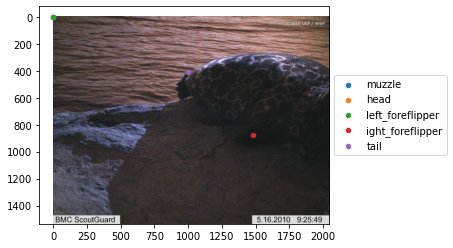

In [ ]:
draw_keypoints_on_image(image_path, df1)

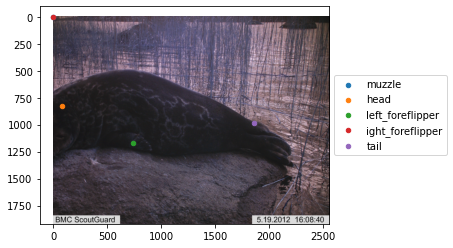

In [ ]:
draw_keypoints_on_image(image_path, df1)

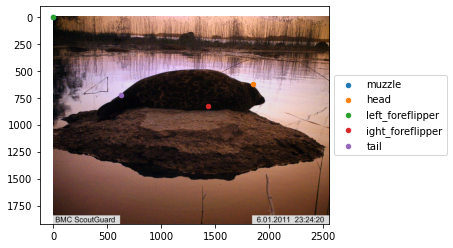

In [ ]:
draw_keypoints_on_image(image_path, df1)

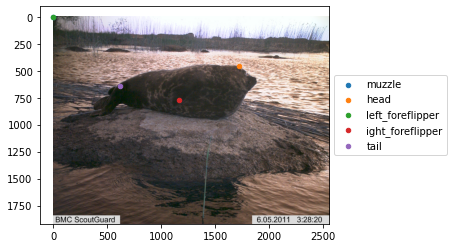

In [ ]:
draw_keypoints_on_image(image_path, df1)

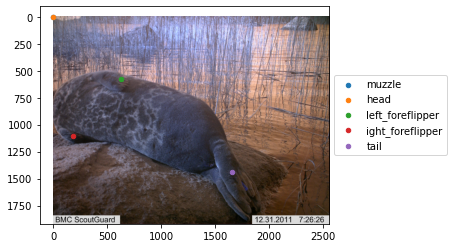

In [ ]:
draw_keypoints_on_image(image_path, df1)

In [ ]:
import os

s = image_path
print (os.path.split(s)[-1])

In [ ]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2

mypath=image_path
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = numpy.empty(len(onlyfiles), dtype=object)
for n in range(10):
  images[n] =join(mypath,onlyfiles[n])
  x=os.path.split(images[n])[-1]
  y=df[0]
  print(x)
    
  

0226aaac-09f0-4e4e-8b88-bdd4728187a4-halfpage.jpg
6ee19418-dabc-4794-a98f-ccbf3f44cf66-master.jpg
d61af726-7e59-4a61-94cd-92622225c7e5-master.jpg
9cd85211-773b-4eec-a682-618168daef95-master.jpg
95f6f3ad-a3ca-4c31-b323-742ad138a3c2-master.jpg
4133822e-d37f-4674-8137-f90dde06c834-master.jpg
3089443b-d79c-4f8a-852b-81e6cb27d6f6-halfpage.jpg
1d344ff7-7893-44e9-9b27-4af08b617251-master.jpg
f1e743e7-274b-4993-b406-ecec937c16e7-master.jpg
4541dda0-c656-4ee6-aeb9-1df9f7c637cd-halfpage.jpg


In [ ]:
s = image_path
for i in range(5):
  x=os.path.split(images[i])[-1]
  y=df[0]
  y=y.iloc[0:i]
  #   print(df[i])
  # df1=df.iloc[i+1:i+2].to_numpy()
  # df1=df1[:,5:] 
  # draw_keypoints_on_image(images[i], df1) 


In [ ]:
import pandas as pd
import argparse
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-whitegrid")

In [ ]:
file_path='/content/drive/MyDrive/hourglasstensorlfow-master/dataset1.txt'
df=pd.read_csv(file_path, sep='\s+',header=None)
df1=df.iloc[0:1].to_numpy()
df1=df1[:,5:]
df.head(115)
df1=df1.drop(df1[0], axis='columns', inplace=True) 

In [ ]:
handles = []

for i_csv, csv_file in enumerate(df1):
    print(csv_file)
    if csv_file == "115":
        plt.plot([], [], " ", label=args.labels[i_csv].replace("_", " "))
        continue
    name_csv = csv_file.replace(".csv", "")

    df = pd.read_csv(csv_file)

    # PCK percentage of correct keypoints
    all_dist = []
    all_pred = []
    all_gt = []
    for i in range(7):
        # Compute all the distances between keypoints - Implementing them does not work well

        fpred = []
        fgt = []
        gt = df[[f"kp{i}x_gt", f"kp{i}y_gt"]].values.tolist()
        pred = df[[f"kp{i}x", f"kp{i}y"]].values.tolist()

        all_gt.append(gt)
        all_pred.append(pred)

        for i_entry, entry in enumerate(gt):
            if entry[0] > 0 and entry[0] < 640 and entry[1] > 0 and entry[1] < 480:
                fgt.append([float(entry[0]), float(entry[1])])
                fpred.append([float(pred[i_entry][0]), float(pred[i_entry][1])])

        pred = np.array(fpred)
        gt = np.array(fgt)

        values = np.linalg.norm(gt - pred, axis=1)

        # print(pair.shape)
        # add them to a single list

        all_dist += values.tolist()

    all_dist = np.array(all_dist)
